In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import seaborn as sns

In [4]:
data = pd.read_excel('breast-cancer.xlsx')
data.columns

Index(['class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps',
       'deg-malig', 'breast', 'breast-quad', 'irradiat'],
      dtype='object')

In [5]:
data.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,0,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,0,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,0,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,0,40-49,premeno,0-4,0-2,no,2,right,right_low,no0


# Kiểm tra số lượng mỗi class

In [6]:
data['class'].value_counts()

0    201
1     85
Name: class, dtype: int64

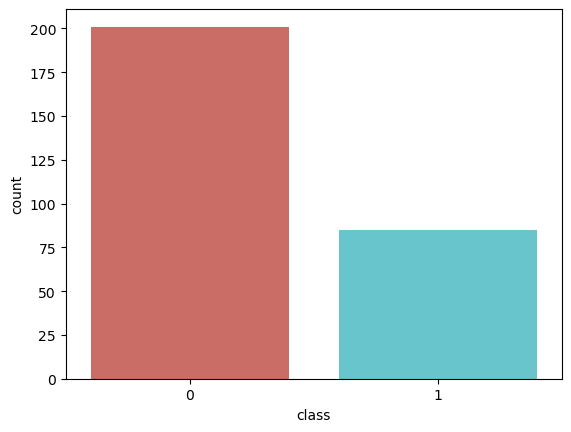

In [9]:
sns.countplot(x='class', data=data, palette='hls')
plt.show()

In [12]:
data.groupby('class').mean()

C:\Users\taqua\AppData\Local\Temp\ipykernel_9248\3465290152.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('class').mean()


,deg-malig
class,
0,1.905473
1,2.388235


# Mối quan hệ giữa các class

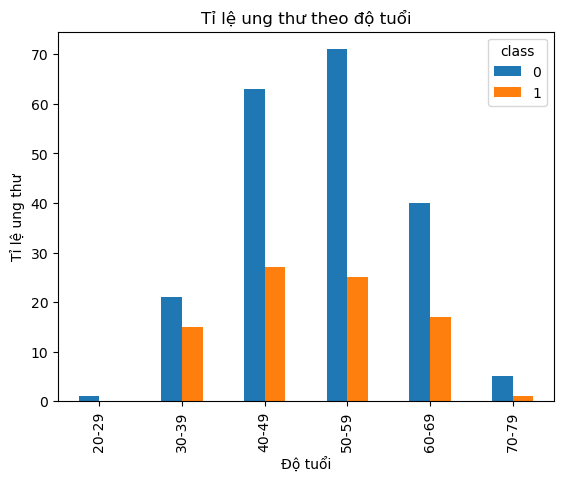

In [13]:
pd.crosstab(data['age'], data['class']).plot(kind='bar')
plt.title('Tỉ lệ ung thư theo độ tuổi')
plt.xlabel('Độ tuổi')
plt.ylabel('Tỉ lệ ung thư')
plt.rc("font", size=15)

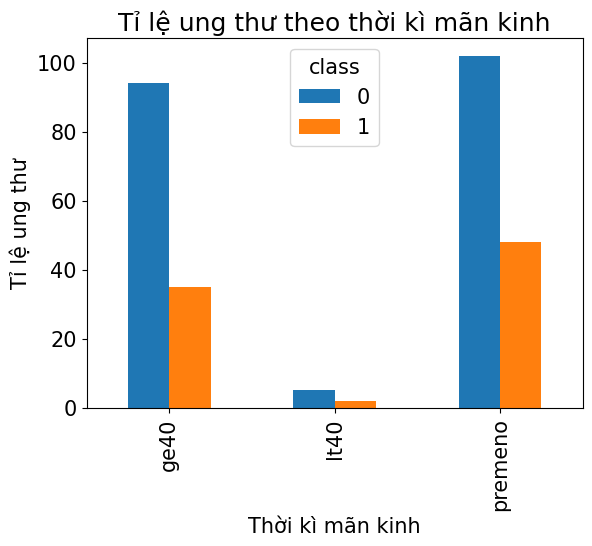

In [14]:
pd.crosstab(data['menopause'], data['class']).plot(kind='bar')
plt.title('Tỉ lệ ung thư theo thời kì mãn kinh')
plt.xlabel('Thời kì mãn kinh')
plt.ylabel('Tỉ lệ ung thư')
plt.rc("font", size=15)

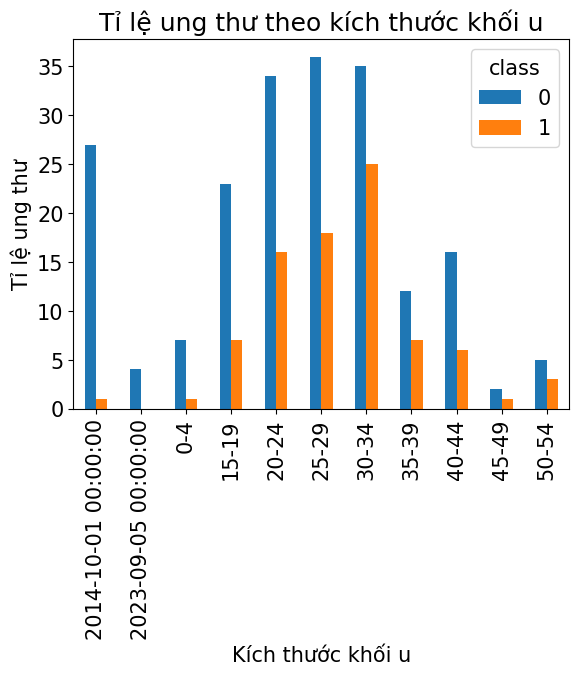

In [15]:
pd.crosstab(data['tumor-size'], data['class']).plot(kind='bar')
plt.title('Tỉ lệ ung thư theo kích thước khối u')
plt.xlabel('Kích thước khối u')
plt.ylabel('Tỉ lệ ung thư')
plt.rc("font", size=15)

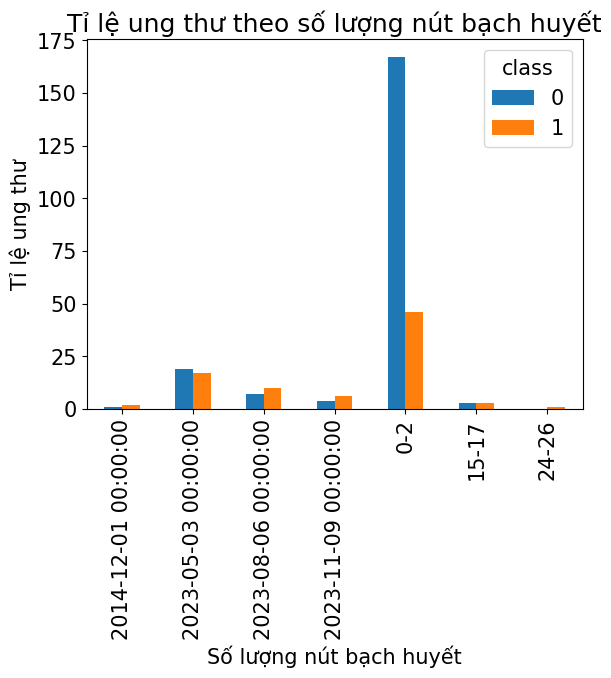

In [16]:
pd.crosstab(data['inv-nodes'], data['class']).plot(kind='bar')
plt.title('Tỉ lệ ung thư theo số lượng nút bạch huyết')
plt.xlabel('Số lượng nút bạch huyết')
plt.ylabel('Tỉ lệ ung thư')
plt.rc("font", size=15)

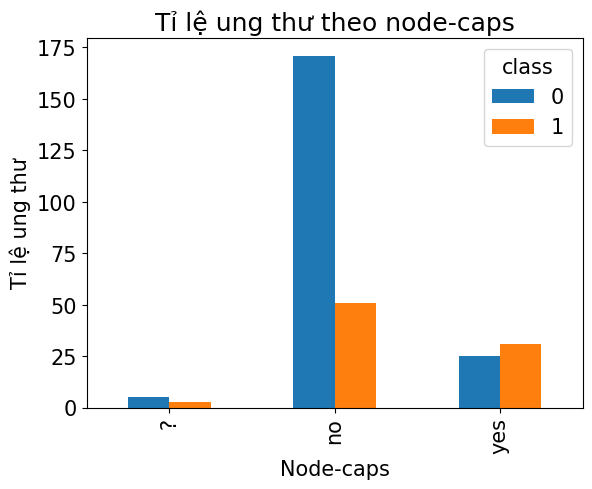

In [17]:
pd.crosstab(data['node-caps'], data['class']).plot(kind='bar')
plt.title('Tỉ lệ ung thư theo node-caps')
plt.xlabel('Node-caps')
plt.ylabel('Tỉ lệ ung thư')
plt.rc("font", size=15)

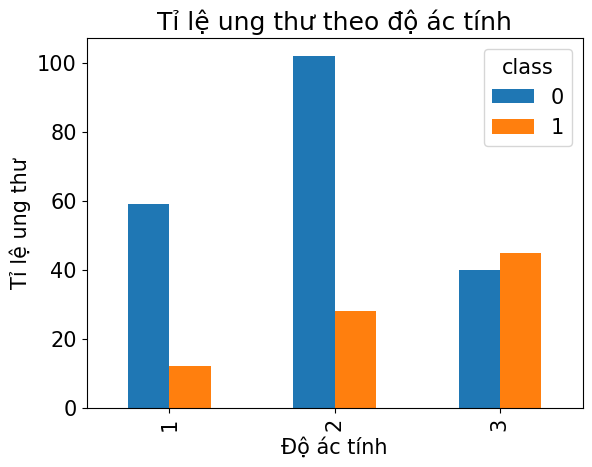

In [18]:
pd.crosstab(data['deg-malig'], data['class']).plot(kind='bar')
plt.title('Tỉ lệ ung thư theo độ ác tính')
plt.xlabel('Độ ác tính')
plt.ylabel('Tỉ lệ ung thư')
plt.rc("font", size=15)

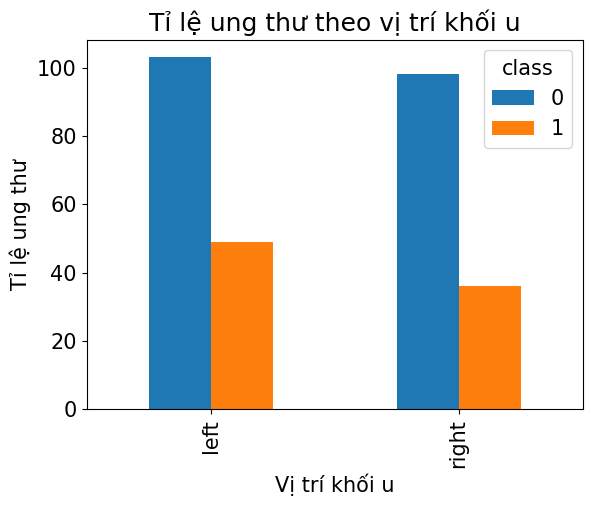

In [19]:
pd.crosstab(data['breast'], data['class']).plot(kind='bar')
plt.title('Tỉ lệ ung thư theo vị trí khối u')
plt.xlabel('Vị trí khối u')
plt.ylabel('Tỉ lệ ung thư')
plt.rc("font", size=15)

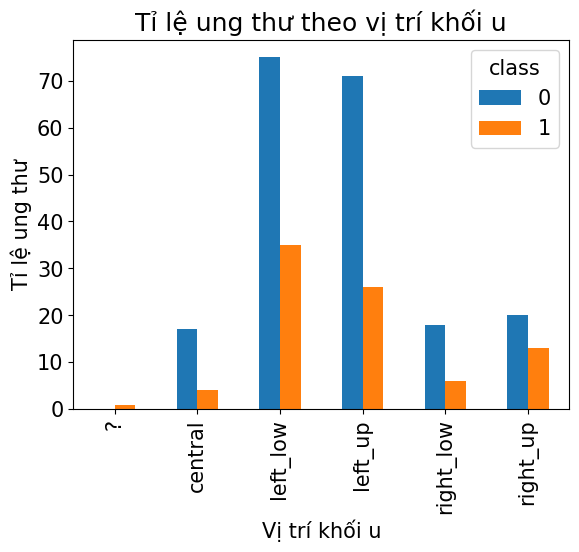

In [21]:
pd.crosstab(data['breast-quad'], data['class']).plot(kind='bar')
plt.title('Tỉ lệ ung thư theo vị trí khối u')
plt.xlabel('Vị trí khối u')
plt.ylabel('Tỉ lệ ung thư')
plt.rc("font", size=15)

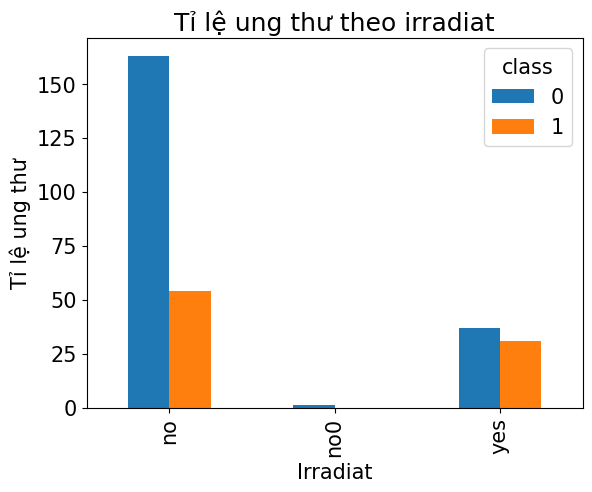

In [22]:
pd.crosstab(data['irradiat'], data['class']).plot(kind='bar')
plt.title('Tỉ lệ ung thư theo irradiat')
plt.xlabel('Irradiat')
plt.ylabel('Tỉ lệ ung thư')
plt.rc("font", size=15)

In [23]:
cat_features = ['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig', 'breast', 'breast-quad', 'irradiat']
for feature in cat_features:
    print(feature)
    job_list = pd.get_dummies(data[feature], prefix=feature)
    new_data = data.join(job_list)
    data = new_data

data.head()

age
menopause
tumor-size
inv-nodes
node-caps
deg-malig
breast
breast-quad
irradiat


,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,...,breast_right,breast-quad_?,breast-quad_central,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up,irradiat_no,irradiat_no0,irradiat_yes
0,0,30-39,premeno,30-34,0-2,no,3,left,left_low,no,...,0,0,0,1,0,0,0,1,0,0
1,0,40-49,premeno,20-24,0-2,no,2,right,right_up,no,...,1,0,0,0,0,0,1,1,0,0
2,0,40-49,premeno,20-24,0-2,no,2,left,left_low,no,...,0,0,0,1,0,0,0,1,0,0
3,0,60-69,ge40,15-19,0-2,no,2,right,left_up,no,...,1,0,0,0,1,0,0,1,0,0
4,0,40-49,premeno,0-4,0-2,no,2,right,right_low,no0,...,1,0,0,0,0,1,0,0,1,0


In [24]:
data_features = data.columns.values.tolist()
print(data_features)
remove_features = ['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig', 'breast', 'breast-quad', 'irradiat']
to_keep_features = [i for i in data_features if i not in remove_features]
print(to_keep_features)

['class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig', 'breast', 'breast-quad', 'irradiat', 'age_20-29', 'age_30-39', 'age_40-49', 'age_50-59', 'age_60-69', 'age_70-79', 'menopause_ge40', 'menopause_lt40', 'menopause_premeno', 'tumor-size_2014-10-01 00:00:00', 'tumor-size_2023-09-05 00:00:00', 'tumor-size_0-4', 'tumor-size_15-19', 'tumor-size_20-24', 'tumor-size_25-29', 'tumor-size_30-34', 'tumor-size_35-39', 'tumor-size_40-44', 'tumor-size_45-49', 'tumor-size_50-54', 'inv-nodes_2014-12-01 00:00:00', 'inv-nodes_2023-05-03 00:00:00', 'inv-nodes_2023-08-06 00:00:00', 'inv-nodes_2023-11-09 00:00:00', 'inv-nodes_0-2', 'inv-nodes_15-17', 'inv-nodes_24-26', 'node-caps_?', 'node-caps_no', 'node-caps_yes', 'deg-malig_1', 'deg-malig_2', 'deg-malig_3', 'breast_left', 'breast_right', 'breast-quad_?', 'breast-quad_central', 'breast-quad_left_low', 'breast-quad_left_up', 'breast-quad_right_low', 'breast-quad_right_up', 'irradiat_no', 'irradiat_no0', 'irradiat_yes']
['cla

In [25]:
data_final = data[to_keep_features]
data_final.head()

,class,age_20-29,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79,menopause_ge40,menopause_lt40,menopause_premeno,...,breast_right,breast-quad_?,breast-quad_central,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up,irradiat_no,irradiat_no0,irradiat_yes
0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,0,1,1,0,0
2,0,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
3,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,1,0


In [27]:
features_X = np.array(data_final.loc[:, data_final.columns != 'class'])
features_X

array([[0, 1, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 1, 0, 0],
       [0, 0, 1, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]], dtype=uint8)

In [28]:
targets_Y = np.array(data_final.loc[:, data_final.columns == 'class'])
targets_Y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [31]:
train_features, test_features, train_targets, test_targets = train_test_split(features_X, targets_Y, test_size=0.3, random_state=0)
print("### Training and test datasets ###")
print("Training size: ", len(train_targets))
print("Test size    : ", len(test_targets))
print(test_targets)

### Training and test datasets ###
Training size:  200
Test size    :  86
[[0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]]


In [32]:
classifier_logreg = LogisticRegression()
classifier_logreg.fit(train_features, train_targets)

C:\Users\taqua\miniconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [33]:
predictions = classifier_logreg.predict(test_features)
print("### Prediction results of Logistic Regression ###")
print("Target labels: ", test_targets.T)
print("Prediction labels: ", predictions)

### Prediction results of Logistic Regression ###
Target labels:  [[0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 1 0 1 1 0 0 0 0 1
  0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0
  1 0 1 1 0 1 0 0 1 0 0 1 0 0]]
Prediction labels:  [0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 1 0 0 0 0 0 0 0 1]


In [35]:
accuracy = 100 * accuracy_score(test_targets, predictions)
print("### Prediction accuracy of Logistic Regression ###")
print("Accuracy: ", accuracy)
print(classification_report(test_targets, predictions))

### Prediction accuracy of Logistic Regression ###
Accuracy:  65.11627906976744
              precision    recall  f1-score   support

           0       0.68      0.87      0.76        55
           1       0.53      0.26      0.35        31

    accuracy                           0.65        86
   macro avg       0.60      0.57      0.55        86
weighted avg       0.62      0.65      0.61        86



In [38]:
predictions = classifier_logreg.predict(train_features)
print("### Prediction results of Logistic Regression ###")
print("Target labels: ", train_targets.T)
print("Prediction labels: ", predictions)

### Prediction results of Logistic Regression ###
Target labels:  [[0 0 1 1 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
  1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0
  0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0
  1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0
  1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0
  0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0]]
Prediction labels:  [0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1]


In [39]:
accuracy = 100 * accuracy_score(train_targets, predictions)
print("### Prediction accuracy of Logistic Regression ###")
print("Accuracy: ", accuracy)
print(classification_report(train_targets, predictions))

### Prediction accuracy of Logistic Regression ###
Accuracy:  79.0
              precision    recall  f1-score   support

           0       0.81      0.93      0.87       146
           1       0.69      0.41      0.51        54

    accuracy                           0.79       200
   macro avg       0.75      0.67      0.69       200
weighted avg       0.78      0.79      0.77       200

